In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import random



sns.reset_defaults()

datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

plt.style.use('fivethirtyeight')
sns.set_palette(datatrooper_palette)
#  #1D1D3D o black
sns.set(rc={'axes.facecolor':'#1D1D3D', 'figure.facecolor':'#1D1D3D'})

sns.set_context("talk")
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
df = pd.read_csv("../datos/movies_metadata.csv")
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

/home/davinchi/Documents/Projects/Datatrooper/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


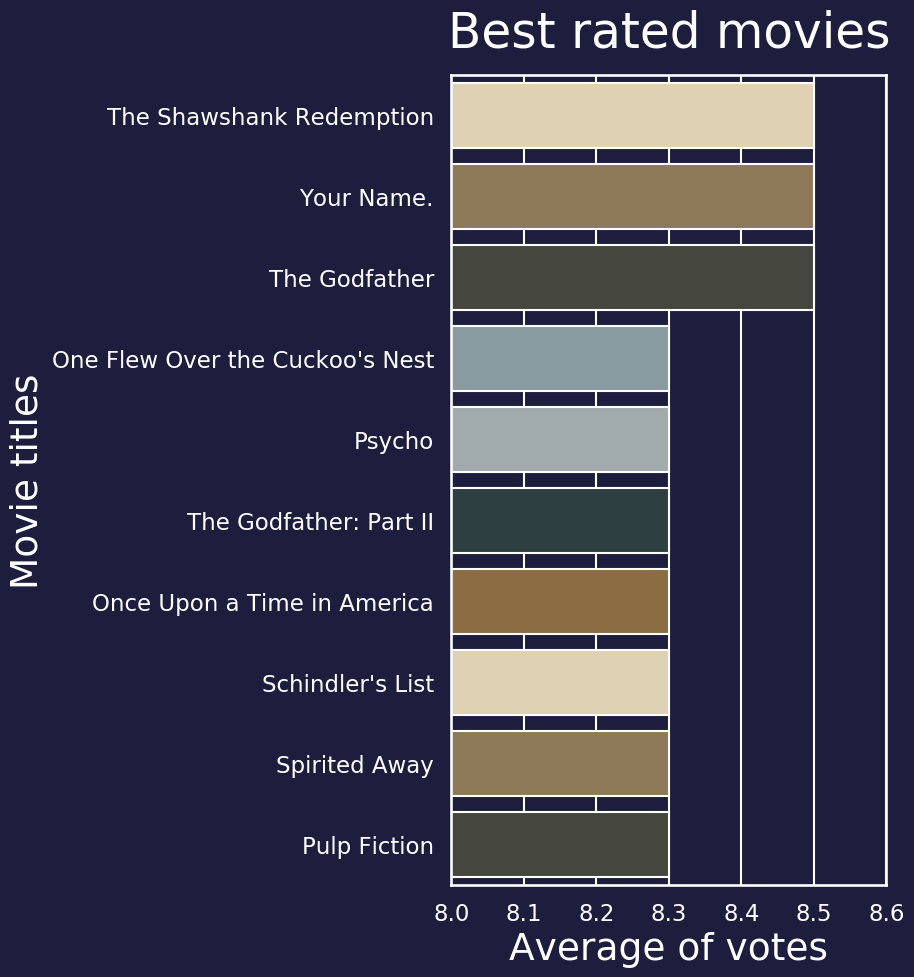

In [4]:
best = df[(df["vote_count"]>1000)].sort_values("vote_average", ascending=False).head(10)
fig = plt.figure(figsize=(5,10))
ax = sns.barplot(y="title", x="vote_average",orient="h", data = best,palette=datatrooper_palette)
plt.xlim(8, 8.6)
ax.set_title("Best rated movies", pad=20, fontsize=35)
ax.set_xlabel("Average of votes", fontsize=27)
ax.set_ylabel("Movie titles", fontsize=27)

plt.show()
fig.savefig('whatever.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

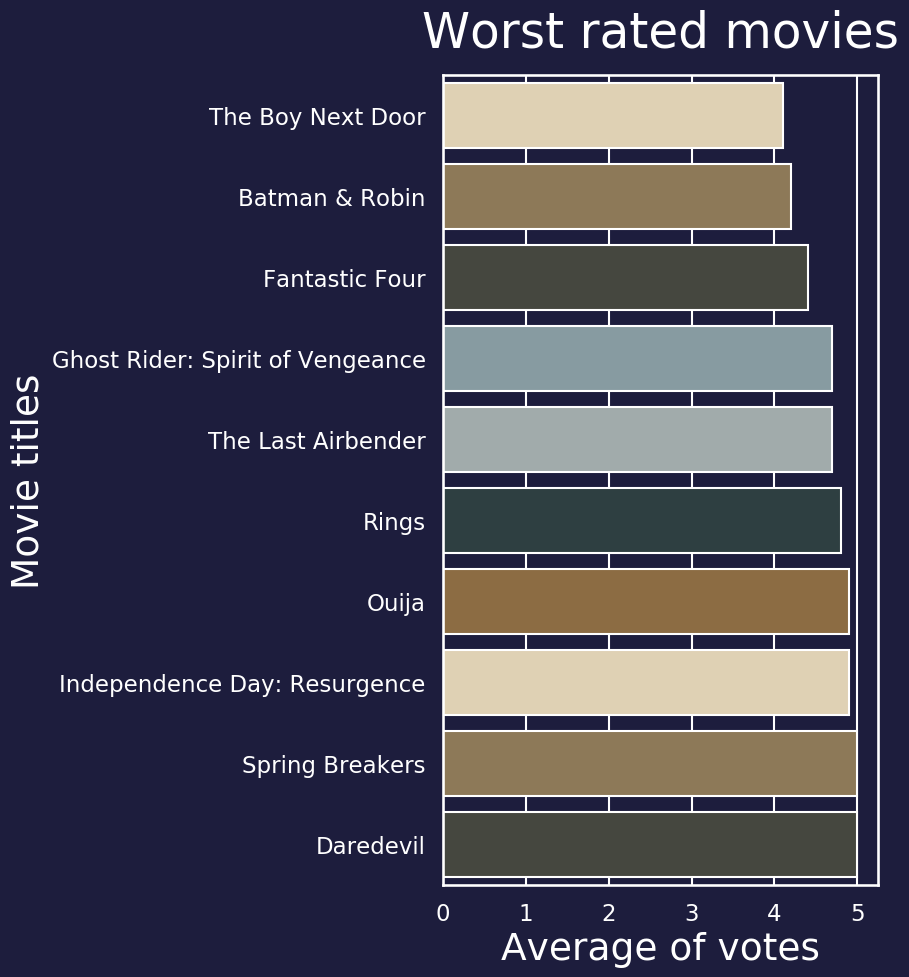

In [5]:
worst = df[(df["vote_count"]>1000)].sort_values("vote_average").head(10)
fig = plt.figure(figsize=(5,10))
ax = sns.barplot(y="title", x="vote_average",orient="h", data = worst,palette=datatrooper_palette)

ax.set_title("Worst rated movies", pad=20, fontsize=35)
ax.set_xlabel("Average of votes", fontsize=27)
ax.set_ylabel("Movie titles", fontsize=27)
plt.show()
fig.savefig('whatever2.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

In [79]:
# plt.figure(figsize=(7,7))
# b = sns.countplot(x="vote_average", data=df, palette=datatrooper_palette)
# for ind, label in enumerate(b.get_xticklabels()):
#     if ind % 10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
# plt.xticks(rotation=90)
# ax.set_title("Best rated movies with more than 1000 votes in imdb", pad=20, fontsize=27)
# plt.xlabel("Average of votes")
# plt.ylabel("Movie titles")
# plt.show()

In [35]:
by_year = pd.DataFrame(df.groupby(df.release_date.dt.year).count()["adult"]).reset_index()
by_year = by_year.rename(columns={"adult":"cuenta"}).drop([131, 132,133,134])
by_year.tail()

,release_date,cuenta
126,2011.0,1667
127,2012.0,1722
128,2013.0,1889
129,2014.0,1974
130,2015.0,1905


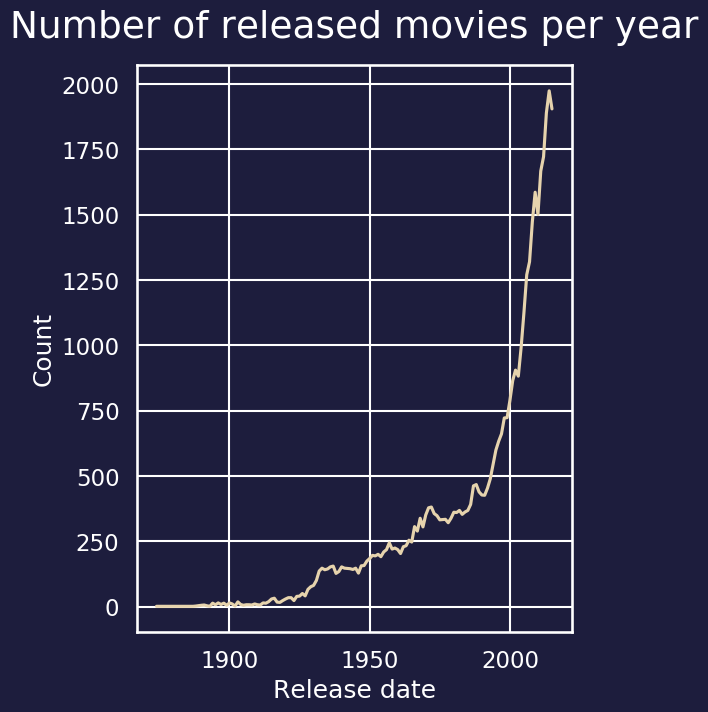

In [127]:
plt.figure(figsize=(5,7))
ax = sns.lineplot(x="release_date", y="cuenta", data=by_year, color='#E6D3AD')

ax.set_title("Number of released movies per year", pad=20, fontsize=27)
plt.xlabel("Release date")
plt.ylabel("Count")
plt.show()

In [81]:
words = df["title"].str.cat(sep=' ').lower().split(" ")

stopwords = get_stop_words('en')
# mylist = ["gets", "The", "scene", "-", "will"]
# stopwords.extend(mylist)
words = [word for word in words if word not in stopwords]
word_count = Counter(words)


In [83]:
word_count

Counter({'toy': 13,
         'story': 393,
         'jumanji': 1,
         'grumpier': 1,
         'old': 80,
         'men': 176,
         'waiting': 26,
         'exhale': 1,
         'father': 55,
         'bride': 61,
         'part': 113,
         'ii': 149,
         'heat': 30,
         'sabrina': 3,
         'tom': 43,
         'huck': 2,
         'sudden': 6,
         'death': 233,
         'goldeneye': 1,
         'american': 207,
         'president': 13,
         'dracula:': 3,
         'dead': 278,
         'loving': 13,
         'balto': 3,
         'nixon': 6,
         'cutthroat': 1,
         'island': 122,
         'casino': 8,
         'sense': 13,
         'sensibility': 4,
         'four': 78,
         'rooms': 5,
         'ace': 13,
         'ventura:': 2,
         'nature': 15,
         'calls': 10,
         'money': 54,
         'train': 54,
         'get': 72,
         'shorty': 1,
         'copycat': 1,
         'assassins': 11,
         'powder': 5,
         'l

In [84]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(230, 217, 168)" 

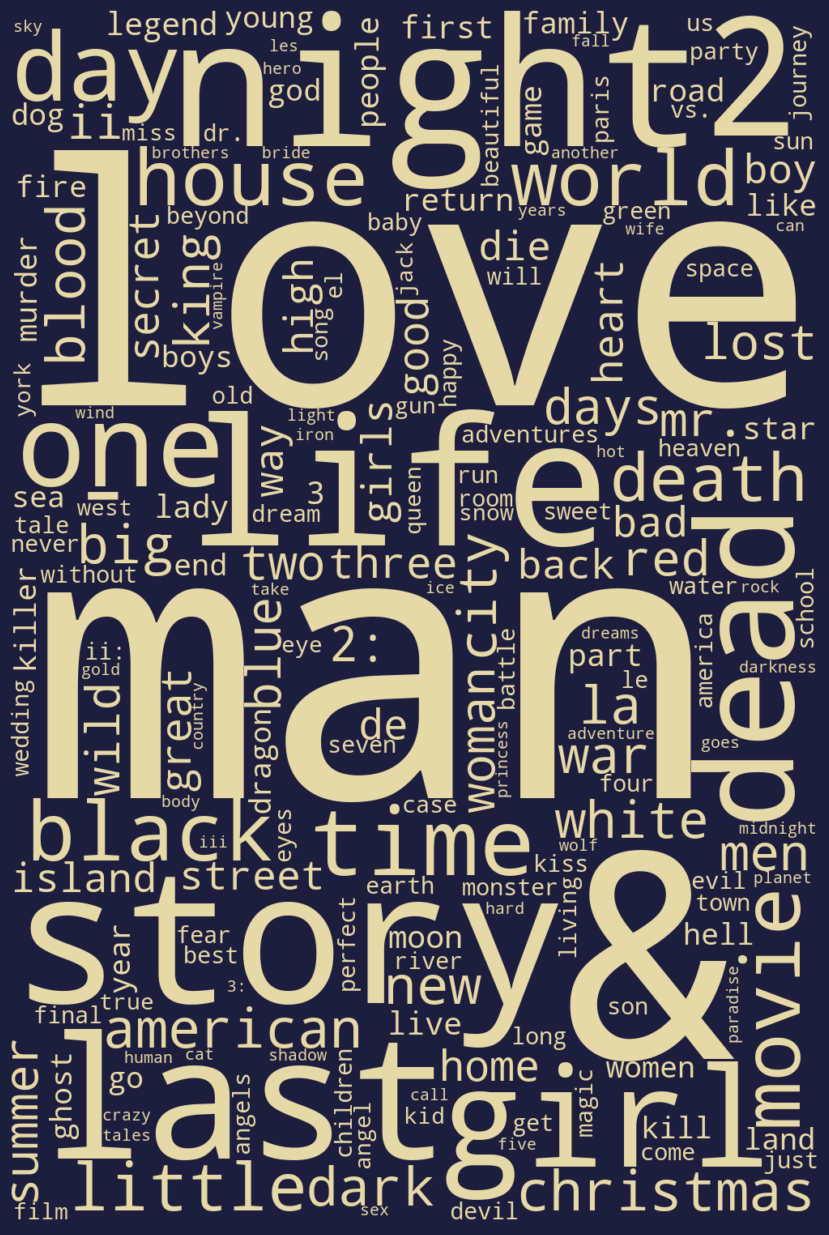

In [90]:
wc = WordCloud(background_color="#1D1D3D",
               width=1000, 
               height=1500).generate_from_frequencies(word_count)
wc.recolor(color_func=white_color_func, random_state=0)

fig = plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()